In [1]:
# Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.
# 1. Prepare Data
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos['Price']= boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
# 2. Check for NULL values
bos.shape   # 506 x 14 
bos.describe()
# No Null values present in the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


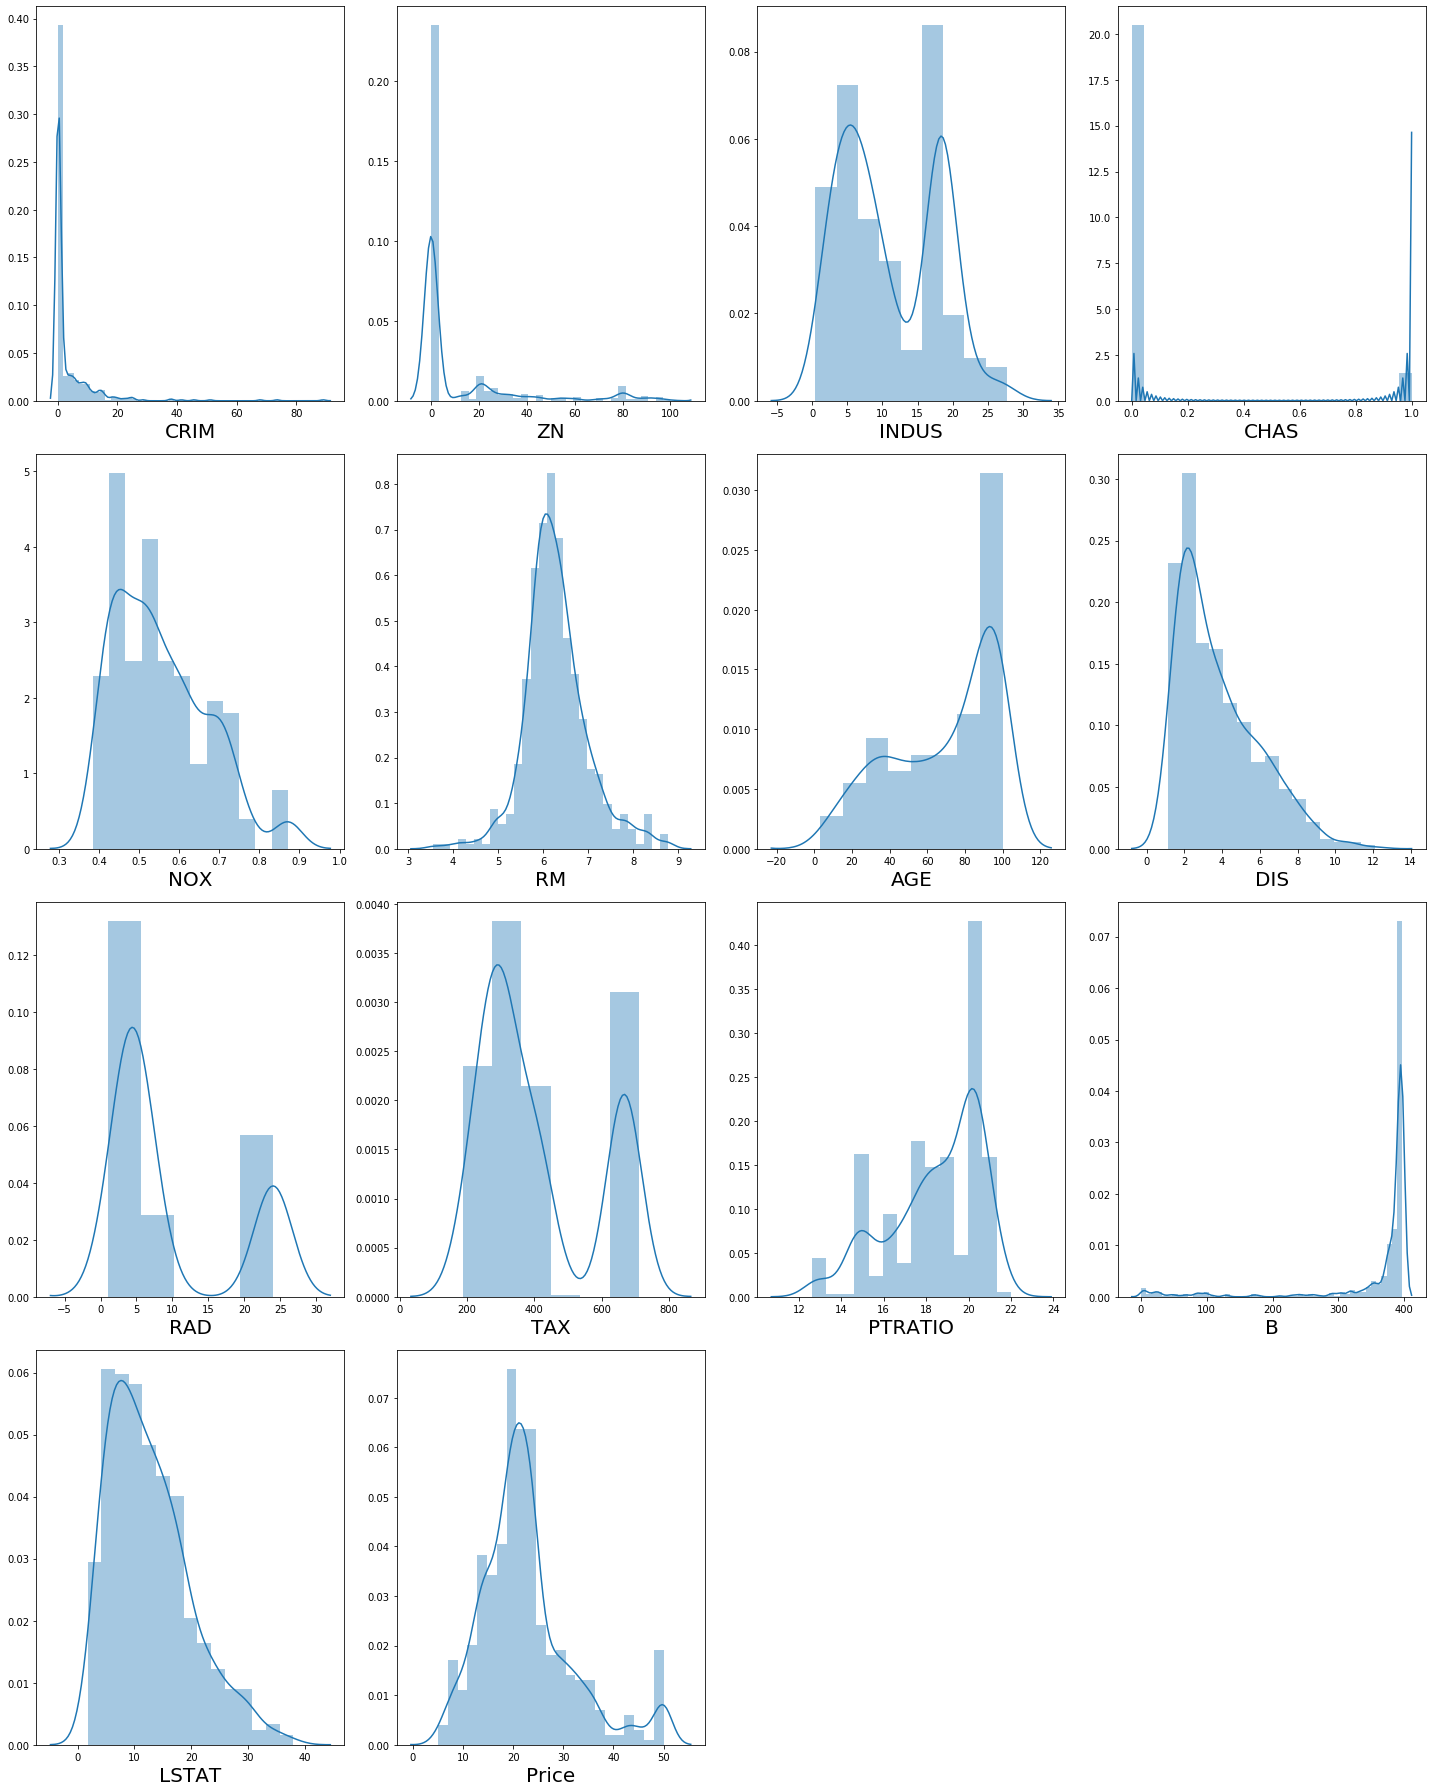

In [3]:
# 3. Check of data have normal distribution
import seaborn as sns
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

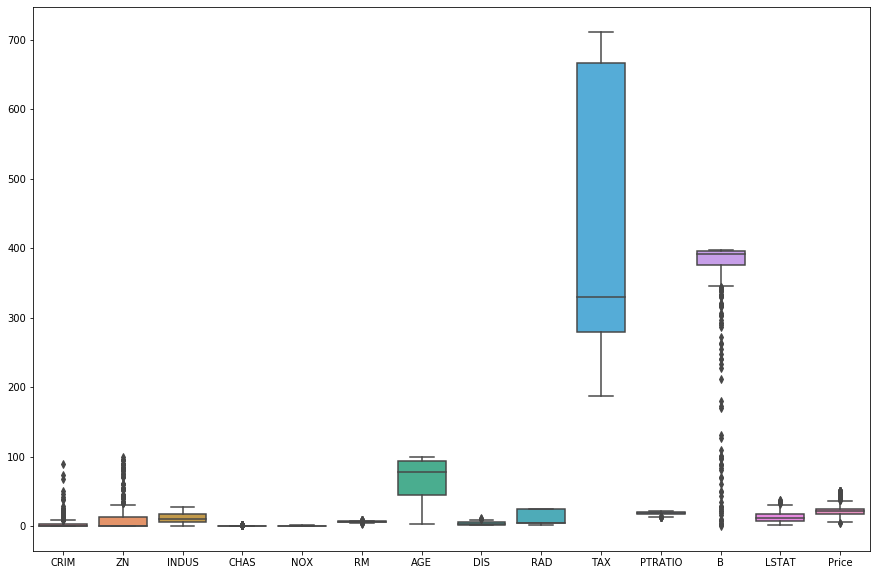

In [4]:
# 4. Check for outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=bos)
# Few columns have outliers

In [5]:
# 5. Remove top or bottom data to handle outliers
q = bos['CRIM'].quantile(0.97)
data_cleaned = bos[bos['CRIM']<q]

q = bos['ZN'].quantile(0.97)
data_cleaned = data_cleaned[data_cleaned['ZN']<q]

q = bos['B'].quantile(0.10)
data_cleaned = data_cleaned[data_cleaned['B']<q]

q = bos['LSTAT'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['LSTAT']<q]

q = bos['LSTAT'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['LSTAT']<q]

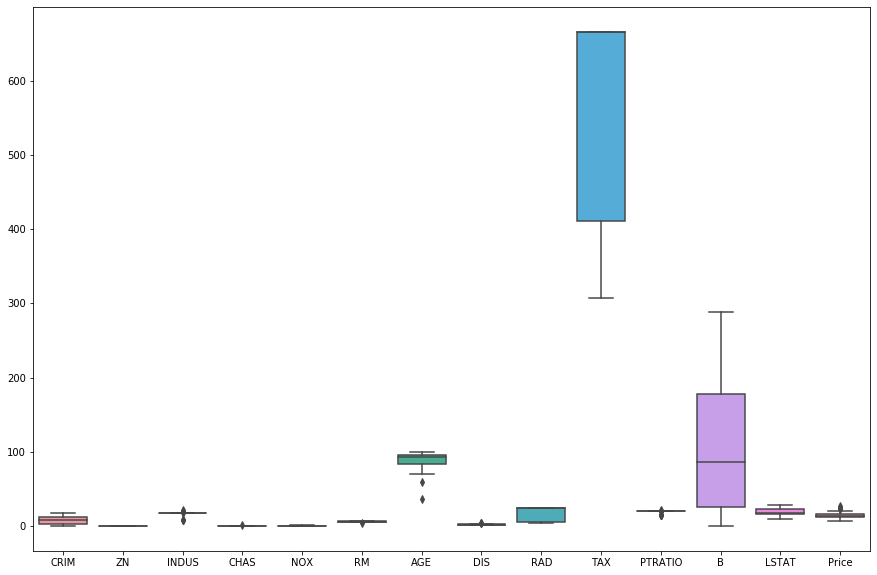

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned)

In [7]:
# 6. Prepare independent and dependent data
y = bos['Price']
X = bos.drop(columns = ['Price'])

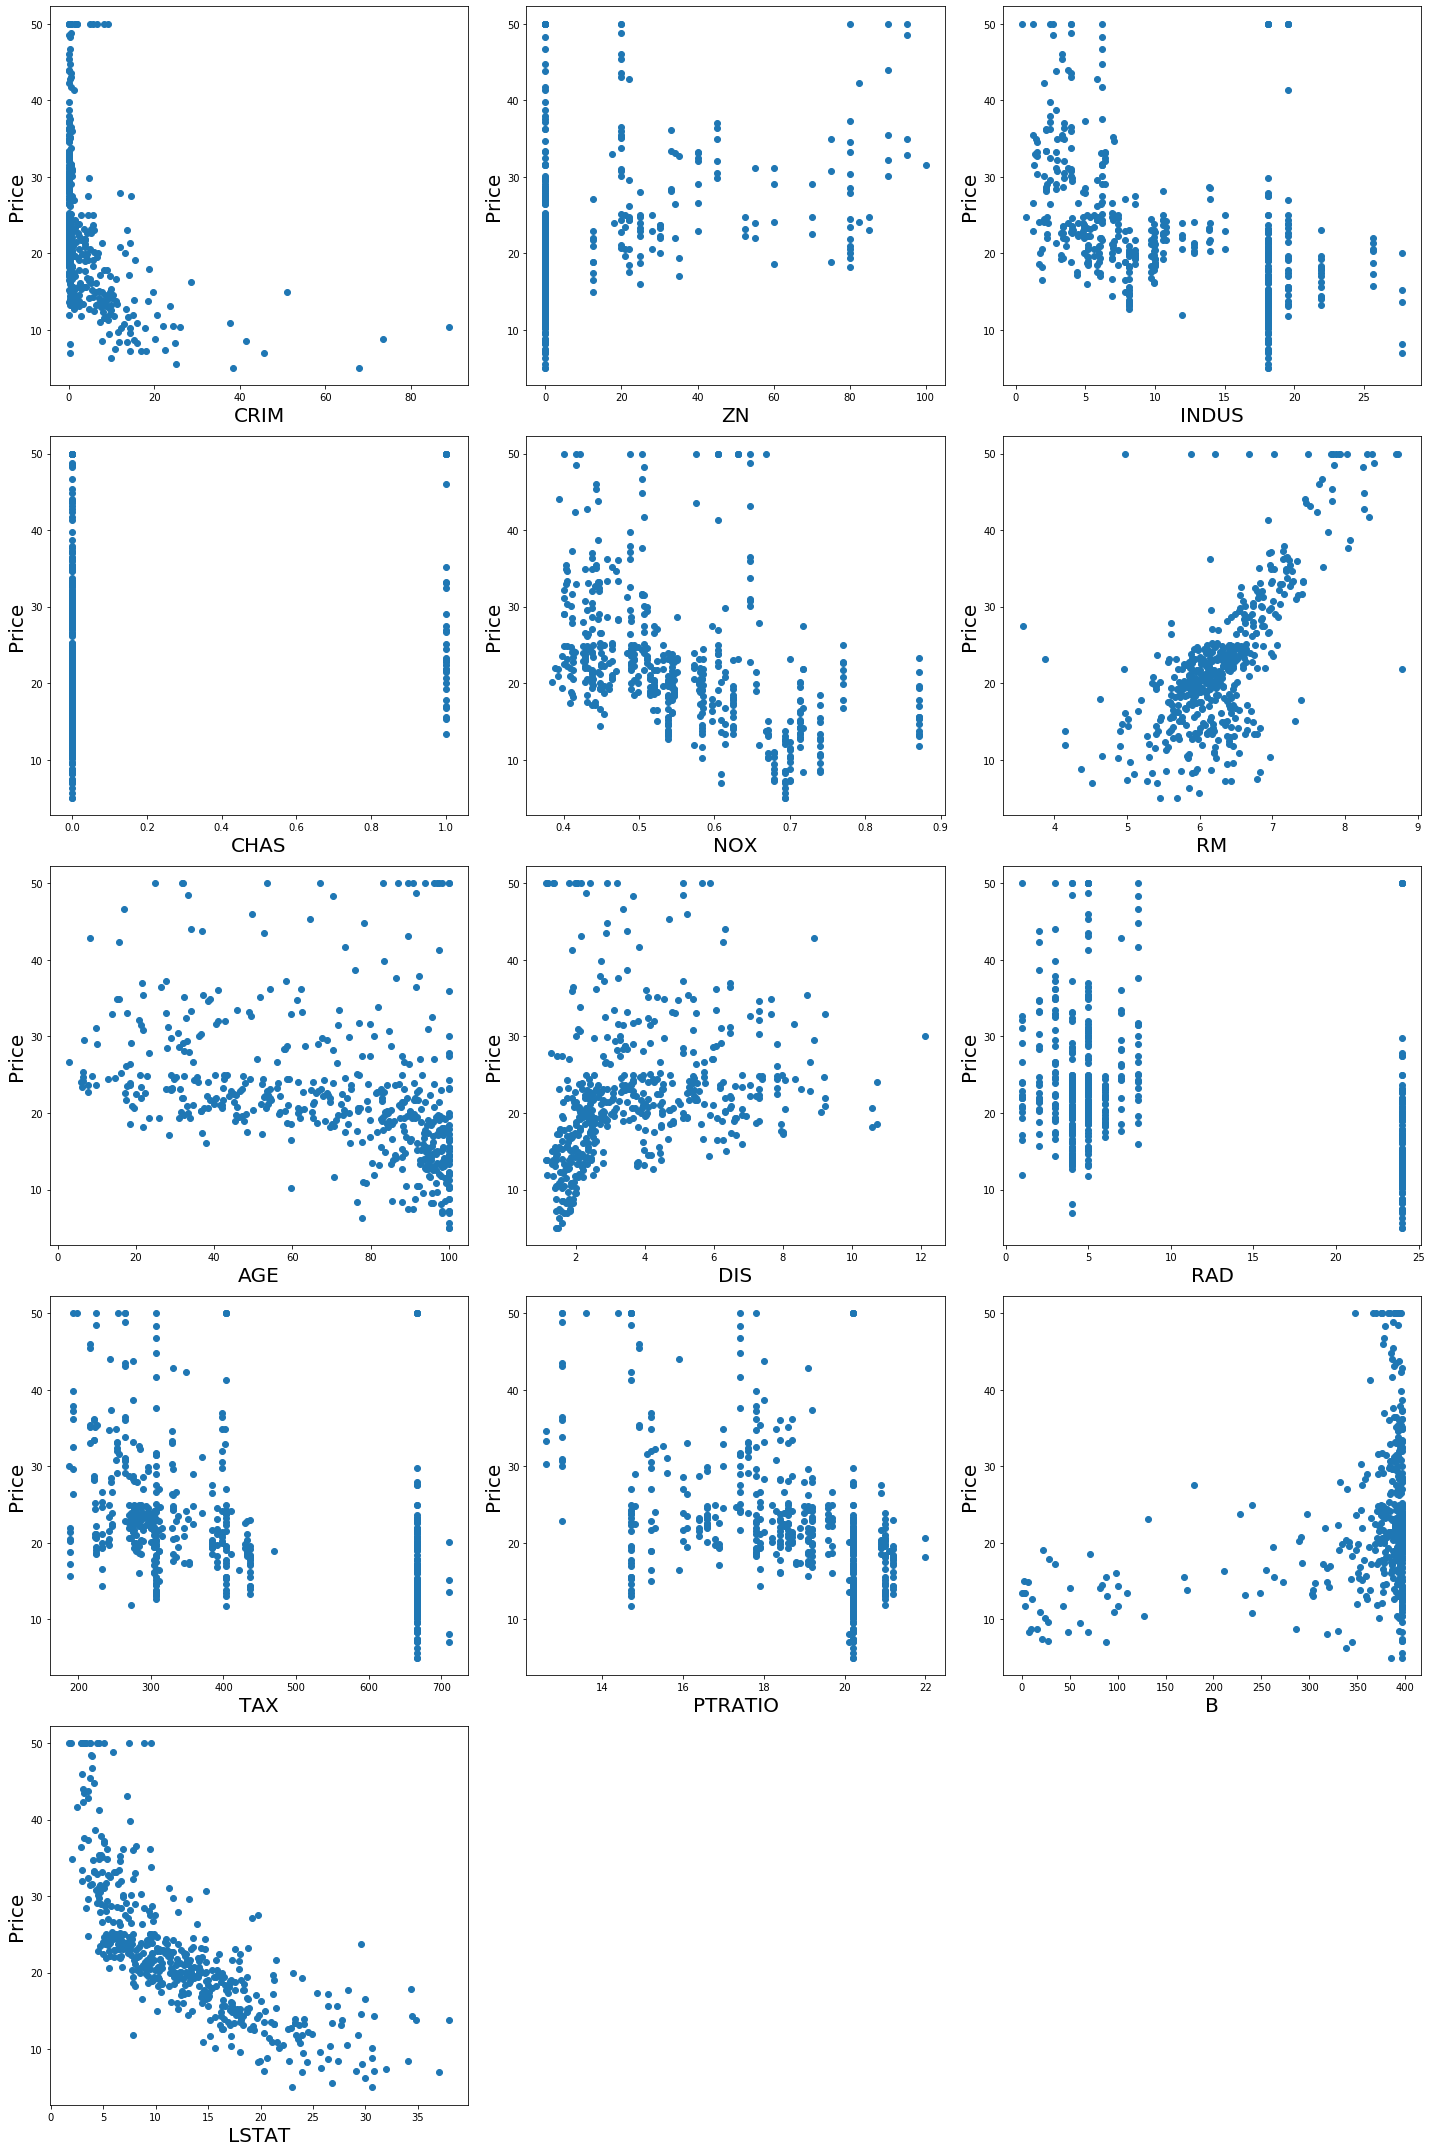

In [8]:
# 7. Plot Scatter Plot to observe Linear relation
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [9]:
# 8. Calculate VIF
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [10]:
# VIF is greaterthan 5 for columns RAD and TAX. Hence drop column TAX.
# Calculate VIF
X= X.drop(columns = ['TAX'])
X_scaled = scaler.fit_transform(X)
variables = X_scaled

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns
vif

,VIF,Features
0,1.791940,CRIM
1,2.184240,ZN
2,3.226015,INDUS
3,1.058220,CHAS
4,4.369271,NOX
5,1.923075,RM
6,3.098044,AGE
7,3.954446,DIS
8,2.837494,RAD
9,1.788839,PTRATIO


In [11]:
# 9. Split train and test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25)

In [12]:
# 10. Fit data into linear model
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# 11. Create pickle file
import pickle
filename = 'Linear_Reg_model.pickle'
pickle.dump(regression, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
# Use created model to predict price
a=loaded_model.predict(scaler.transform([[0.028,15,5,0,0.48,7.13,65,2,5,17.66,394,8.13]]))
a

array([32.69608836])

In [15]:
regression.score(x_train,y_train)

0.733355920088633

In [16]:
regression.score(x_test,y_test)

0.7218074744806097